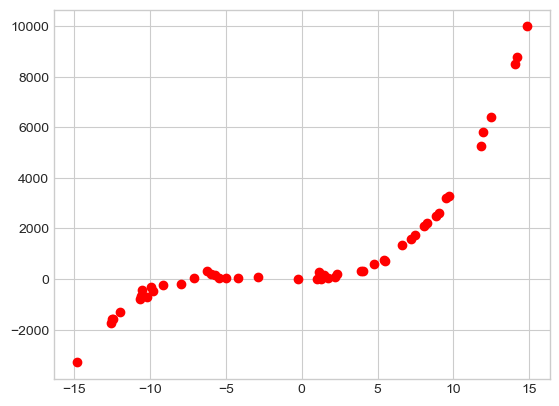

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
noise_scale = 100
number_of_samples = 50
x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

1. Please plot the noisy data and the polynomial you found (in the same figure). You can use any
value of m selected from 2, 3, 4, 5, 6.

with a two second degree polynomial can only do one curve

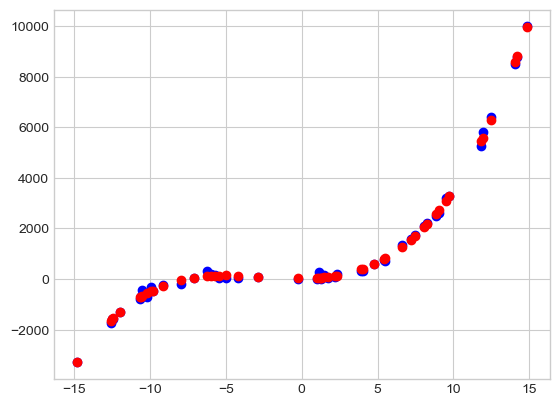

MSE is 9283.676187472853


In [4]:
#Applying a linear fit with polyfit and reshaping this to one row of data 
x = np.reshape(x,(1,number_of_samples))
x = x[0,:]
y = np.reshape(y,(1,number_of_samples))
y = y[0,:]

#make model of the line
fitted_parameters = np.polyfit(x, y, 3)
mymodel = np.poly1d(fitted_parameters)
#create data from the x min to the x max to put through the model and make the prediction output
# myline = np.linspace(min(x), max(x), number_of_samples)
#make the output prediction by passing the newly created input data through the model
# y_pred =  mymodel(myline)

y_pred =  mymodel(x)
plt.scatter(x, y, color = 'b')
# plt.plot(myline,y_pred, color = 'r')
plt.scatter(x,y_pred, color = 'r')
plt.show()

MSE = np.square(np.subtract(y,mymodel(x))).mean()
print(f"MSE is {MSE}")
#print(((sum((y-y_pred)**2)))/number_of_samples)

2) Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m. 
Best choice of m is:

[2354525.7236309345, 1010814.2287770064, 9283.676187472853, 9208.600009171802, 9203.86884591313, 9194.814121272806, 9150.058091878904, 8894.34056386693]
The best choice of m is 8 where the MSE is 8894.34056386693


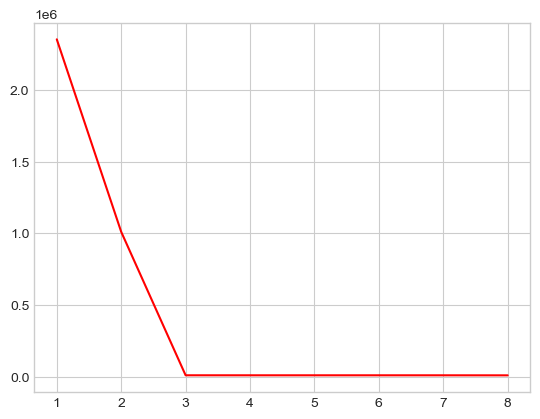

In [5]:
#find the Mean Squared Error for m=1>8

m = [1,2,3,4,5,6,7,8]
MSE = [] 
for i in range(len(m)):    
    currentModel = np.poly1d(np.polyfit(x, y, m[i]))
    #create data from the x min to the x max to put through the model and make predictions of the output
    # testInputData = np.linspace(min(x), max(x), number_of_samples)
    #make the output prediction by passing the newly created input data through the model
    # y_pred =  currentModel(testInputData)
    y_pred =  currentModel(x)
    #find Mean Squared Error for m = 1->8
    actual, pred = np.array(y), np.array(y_pred)
    mse =  np.square(np.subtract(actual,pred)).mean()
    MSE.append( mse )

print(MSE)

minMSE = min(MSE)
#use index() to find where the MIN MSE lives, this helps us get our M value we add one because the array index of 0 is actually m of 1
mVal = MSE.index(minMSE)+1
print(f"The best choice of m is {mVal} where the MSE is {minMSE}")
plt.plot(m, MSE, color = 'r')
plt.show()

3. Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm 
and plot the polynomials with the m found in 2). Discuss the impact of noise scale to the 
accuracy of the returned parameters. [You need to plot a figure like in 1) for EACH choice of 
noise_scale.] 

As the noise scale increases the points get further away from the predicted line, this means the mean squared error increases as well.Based on the graphs you can see that the accuracy of the predicted points decreases as the noise gets increased. 

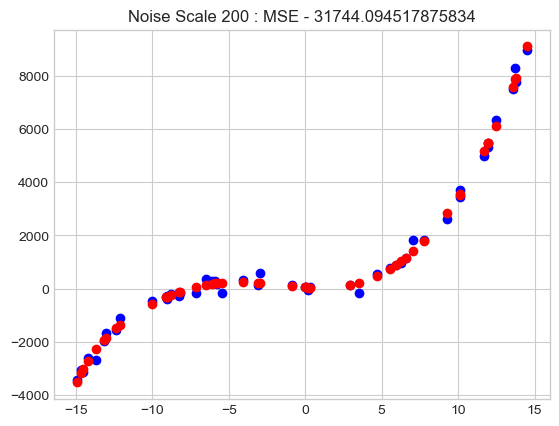

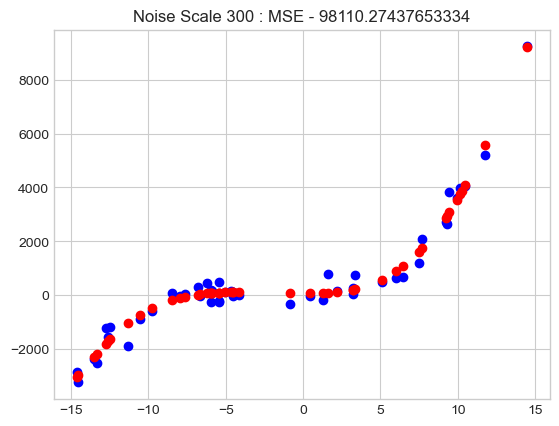

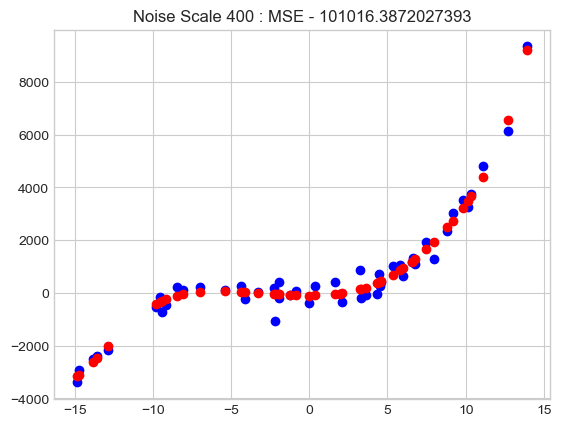

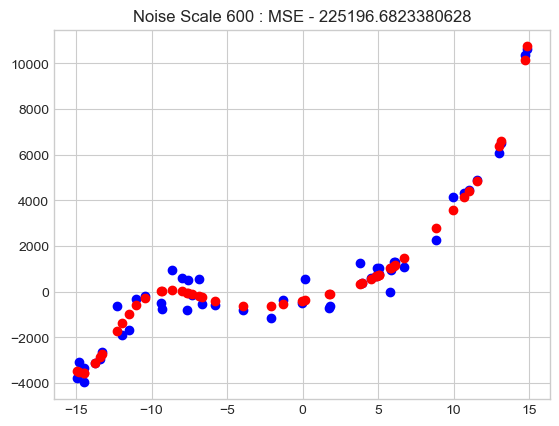

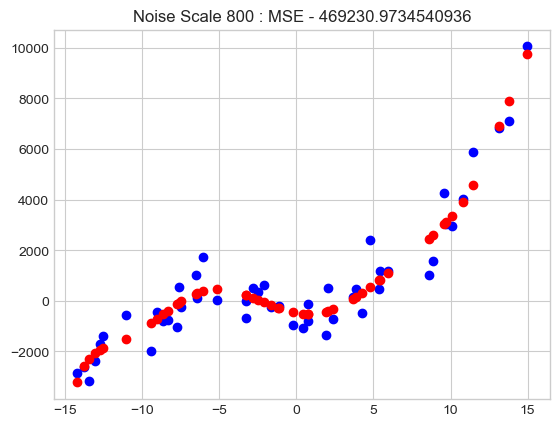

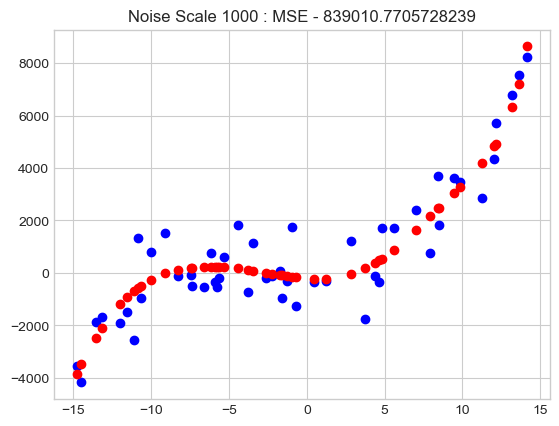

In [27]:
m = mVal

noise_scale = [200,300,400,600,800,1000]
number_of_samples = 50

for i in range(len(noise_scale)):   
    x = 30*(np.random.rand(number_of_samples, 1) - 0.5)     
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale[i]*np.random.randn(number_of_samples, 1)
    x = np.reshape(x,(1,number_of_samples))
    x = x[0,:]
    y = np.reshape(y,(1,number_of_samples))
    y = y[0,:]
    
    #make the model of the line
    mymodel = np.poly1d(np.polyfit(x, y, m))
    #create data from the x min to the x max to put through the model and make predictions of the output
    #myline = np.linspace(min(x), max(x), number_of_samples)
    #make the output prediction by passing the newly created input data through the model
    y_pred =  mymodel(x)
    #calculate mse
    actual, pred = np.array(y), np.array(y_pred)
    mse = np.mean((y - y_pred)**2)
    
    plt.title(f"Noise Scale {noise_scale[i]} : MSE - {mse}")
    plt.scatter(x, y, color = 'b')
    plt.scatter(x,y_pred, color = 'r')
    plt.show()

4. Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot 
the polynomials with the m found in 2). Discuss the impact of the number of samples to the 
accuracy of the returned parameters. [You need to plot a figure like in 1) for EACH choice of 
number_of_samples.] 

The observation that I have made from changing the sample size is that as you go lower in sample sizes the accuracy of prediction becomes harder because we have less information to go off, and the quality of the sample decreases. 


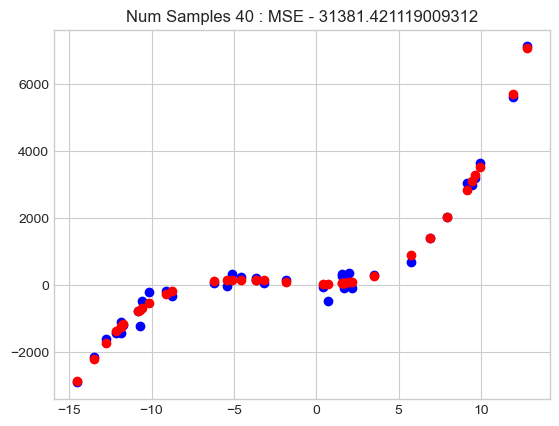

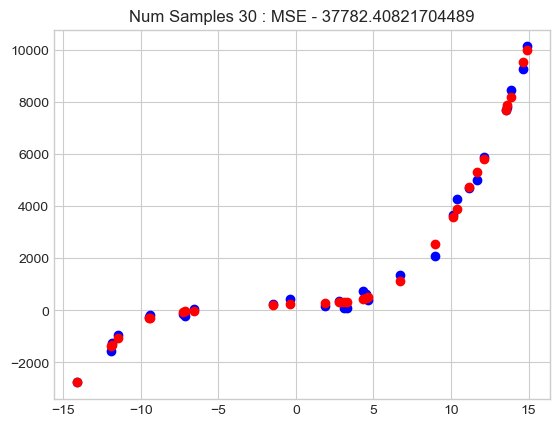

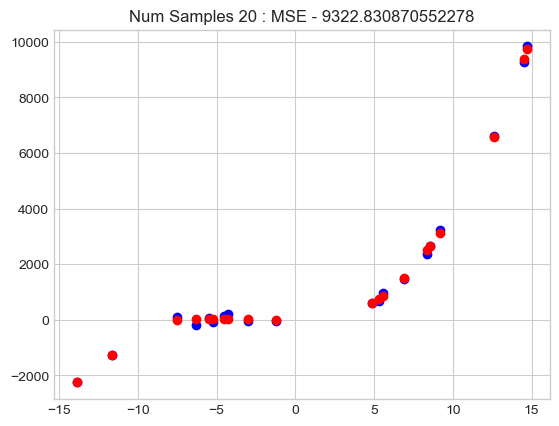

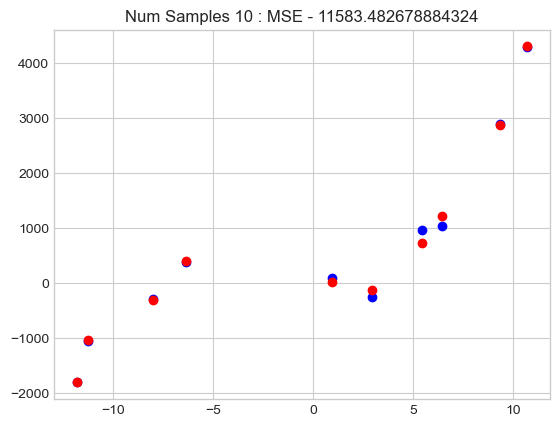

In [28]:
m = mVal
noise_scale = 200
number_of_samples = [40,30,20,10]
#print(x.shape)
#x = np.reshape(x,(1,number_of_samples))
#x = x[0,:]
for i in range(len(number_of_samples)):   
    x = 30*(np.random.rand(number_of_samples[i], 1) - 0.5)     
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples[i], 1)
    x = np.reshape(x,(1,number_of_samples[i]))
    x = x[0,:]
    y = np.reshape(y,(1,number_of_samples[i]))
    y = y[0,:]
    #make the model of the line
    mymodel = np.poly1d(np.polyfit(x, y, m))
    #create data from the x min to the x max to put through the model and make predictions of the output
    #myline = np.linspace(min(x), max(x), number_of_samples[i])
    #make the output prediction by passing the newly created input data through the model
    y_pred =  mymodel(x)
    #calculate mse
    actual, pred = np.array(y), np.array(y_pred)
    mse = np.mean((y - y_pred)**2)
    
    plt.title(f"Num Samples {number_of_samples[i]} : MSE - {mse}")
    plt.scatter(x, y, color = 'b')
    plt.scatter(x,y_pred, color = 'r')
    plt.show()